In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, IsolationForest
from transformers import BertTokenizer, TFBertForSequenceClassification
import tensorflow as tf
import hashlib
import time
import csv
import datetime
import shap
import xgboost as xgb
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.cm as cm
from windrose import WindroseAxes


In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
data = pd.read_csv("/content/drive/My Drive/Traffic prediciton/traffic_data.csv")

# Check for missing values
print(data.isnull().sum())

date_time              0
is_holiday             0
air_pollution_index    0
humidity               0
wind_speed             0
wind_direction         0
visibility_in_miles    0
dew_point              0
temperature            0
rain_p_h               0
snow_p_h               0
clouds_all             0
weather_type           0
weather_description    0
traffic_volume         0
last_1_hour_traffic    0
last_2_hour_traffic    0
last_3_hour_traffic    0
last_4_hour_traffic    0
last_5_hour_traffic    0
last_6_hour_traffic    0
hour                   0
month_day              0
weekday                0
month                  0
year                   0
dtype: int64


In [58]:
data.head()

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,...,last_2_hour_traffic,last_3_hour_traffic,last_4_hour_traffic,last_5_hour_traffic,last_6_hour_traffic,hour,month_day,weekday,month,year
0,2012-10-02 15:00:00,0,184,64,3,328,7,7,293.17,0.0,...,4918.0,5026.0,4767.0,4516.0,5545.0,15,2,2,10,2012
1,2012-10-02 16:00:00,0,167,64,3,327,7,7,293.86,0.0,...,5181.0,4918.0,5026.0,4767.0,4516.0,16,2,2,10,2012
2,2012-10-02 17:00:00,0,119,63,3,327,6,6,294.14,0.0,...,5584.0,5181.0,4918.0,5026.0,4767.0,17,2,2,10,2012
3,2012-10-02 18:00:00,0,161,63,3,326,3,3,293.10,0.0,...,6015.0,5584.0,5181.0,4918.0,5026.0,18,2,2,10,2012
4,2012-10-02 19:00:00,0,243,62,3,326,8,8,290.97,0.0,...,5791.0,6015.0,5584.0,5181.0,4918.0,19,2,2,10,2012


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33744 entries, 0 to 33743
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date_time            33744 non-null  object 
 1   is_holiday           33744 non-null  int64  
 2   air_pollution_index  33744 non-null  int64  
 3   humidity             33744 non-null  int64  
 4   wind_speed           33744 non-null  int64  
 5   wind_direction       33744 non-null  int64  
 6   visibility_in_miles  33744 non-null  int64  
 7   dew_point            33744 non-null  int64  
 8   temperature          33744 non-null  float64
 9   rain_p_h             33744 non-null  float64
 10  snow_p_h             33744 non-null  float64
 11  clouds_all           33744 non-null  int64  
 12  weather_type         33744 non-null  object 
 13  weather_description  33744 non-null  object 
 14  traffic_volume       33744 non-null  int64  
 15  last_1_hour_traffic  33744 non-null 

In [60]:
data.describe()

,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,...,last_2_hour_traffic,last_3_hour_traffic,last_4_hour_traffic,last_5_hour_traffic,last_6_hour_traffic,hour,month_day,weekday,month,year
count,33744.000000,33744.000000,33744.000000,33744.000000,33744.000000,33744.000000,33744.000000,33744.000000,33744.000000,33744.000000,...,33744.000000,33744.000000,33744.000000,33744.000000,33744.000000,33744.000000,33744.000000,33744.000000,33744.000000,33744.000000
mean,0.001274,154.847143,71.209282,3.378289,199.448821,4.989983,4.989983,280.067816,0.448819,0.000318,...,3240.027205,3240.111131,3240.187381,3240.251630,3240.346373,11.404368,15.649301,3.983019,6.407035,2014.640292
std,0.035675,83.733242,16.853337,2.055956,99.835021,2.569985,2.569985,13.415782,53.531259,0.009760,...,1991.517218,1991.532808,1991.542010,1991.548197,1991.581794,6.951659,8.699438,2.005721,3.543232,1.572591
min,0.000000,10.000000,13.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2012.000000
25%,0.000000,83.000000,60.000000,2.000000,130.000000,3.000000,3.000000,271.720000,0.000000,0.000000,...,1165.000000,1165.000000,1165.000000,1165.000000,1165.000000,5.000000,8.000000,2.000000,3.000000,2013.000000
50%,0.000000,155.000000,72.000000,3.000000,200.000000,5.000000,5.000000,280.150000,0.000000,0.000000,...,3334.500000,3335.000000,3335.000000,3335.500000,3336.000000,11.000000,16.000000,4.000000,6.000000,2015.000000
75%,0.000000,228.000000,85.000000,5.000000,290.000000,7.000000,7.000000,290.620000,0.000000,0.000000,...,4926.000000,4926.000000,4926.000000,4926.000000,4926.000000,17.000000,23.000000,6.000000,10.000000,2016.000000
max,1.000000,299.000000,100.000000,16.000000,360.000000,9.000000,9.000000,308.240000,9831.300000,0.510000,...,7280.000000,7280.000000,7280.000000,7280.000000,7280.000000,23.000000,31.000000,7.000000,12.000000,2017.000000


In [61]:
# Feature Engineering
# Extract temporal features from date_time column
data['date_time'] = pd.to_datetime(data['date_time'])
data['hour'] = data['date_time'].dt.hour
data['month_day'] = data['date_time'].dt.day
data['weekday'] = data['date_time'].dt.weekday
data['month'] = data['date_time'].dt.month
data['year'] = data['date_time'].dt.year

In [62]:
for i in range(1, 7):
    data[f'last_{i}_hour_traffic'] = data['traffic_volume'].shift(i)

In [63]:
# One-hot encode categorical features
categorical_features = ['is_holiday', 'weather_type', 'weather_description']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
data_categorical = categorical_transformer.fit_transform(data[categorical_features]).toarray()
data_categorical = pd.DataFrame(data_categorical, columns=categorical_transformer.get_feature_names_out(categorical_features))
data = pd.concat([data.drop(categorical_features, axis=1), data_categorical], axis=1)

In [64]:
data.head()

,date_time,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,...,weather_description_sleet,weather_description_smoke,weather_description_snow,weather_description_thunderstorm,weather_description_thunderstorm with drizzle,weather_description_thunderstorm with heavy rain,weather_description_thunderstorm with light drizzle,weather_description_thunderstorm with light rain,weather_description_thunderstorm with rain,weather_description_very heavy rain
0,2012-10-02 15:00:00,184,64,3,328,7,7,293.17,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2012-10-02 16:00:00,167,64,3,327,7,7,293.86,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2012-10-02 17:00:00,119,63,3,327,6,6,294.14,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2012-10-02 18:00:00,161,63,3,326,3,3,293.10,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2012-10-02 19:00:00,243,62,3,326,8,8,290.97,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
# Split data into features (X) and target variable (y)
X = data.drop(['traffic_volume', 'date_time'], axis=1)
y = data['traffic_volume']

In [66]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [67]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


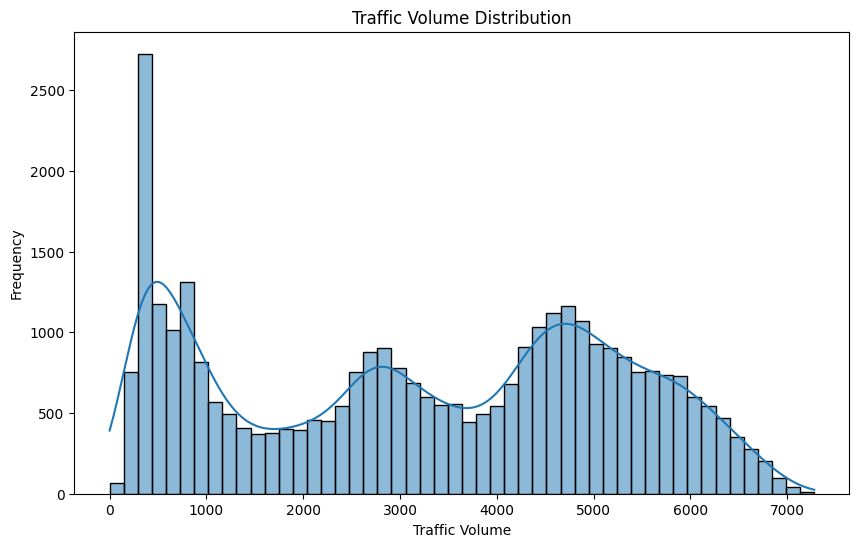

In [68]:
# EDA and Visualization
# Analyze the distribution of traffic volume
plt.figure(figsize=(10, 6))
sns.histplot(data['traffic_volume'], bins=50, kde=True)
plt.title('Traffic Volume Distribution')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.show()

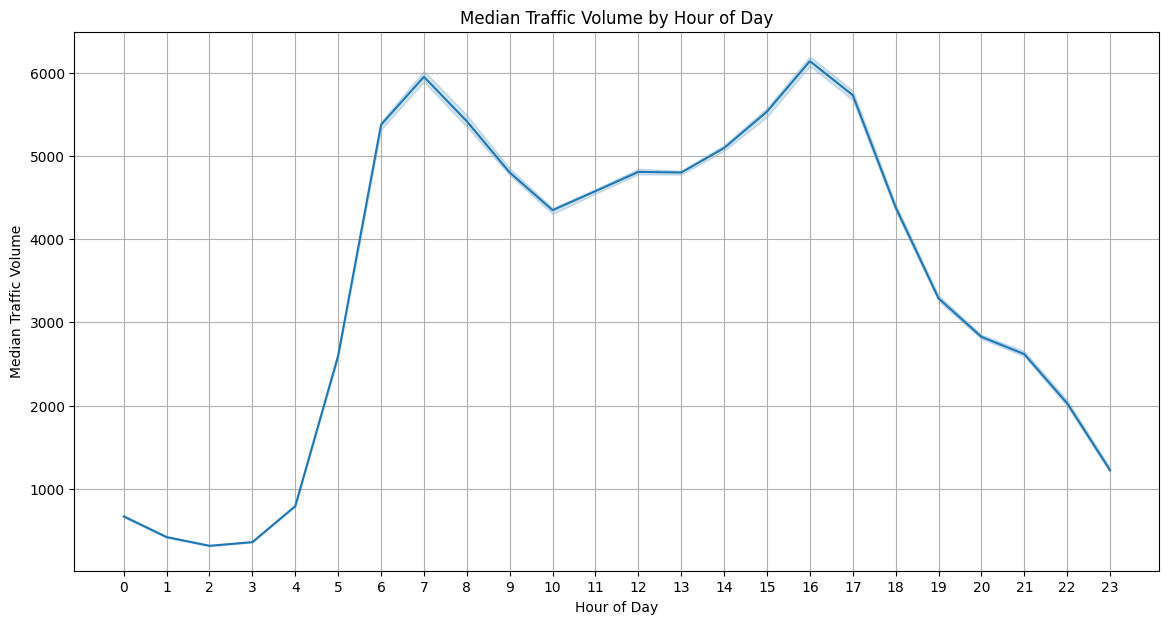

In [69]:
# Analyze traffic volume by hour of day
plt.figure(figsize=(14, 7))
sns.lineplot(x='hour', y='traffic_volume', data=data, estimator=np.median)
plt.title('Median Traffic Volume by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Median Traffic Volume')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

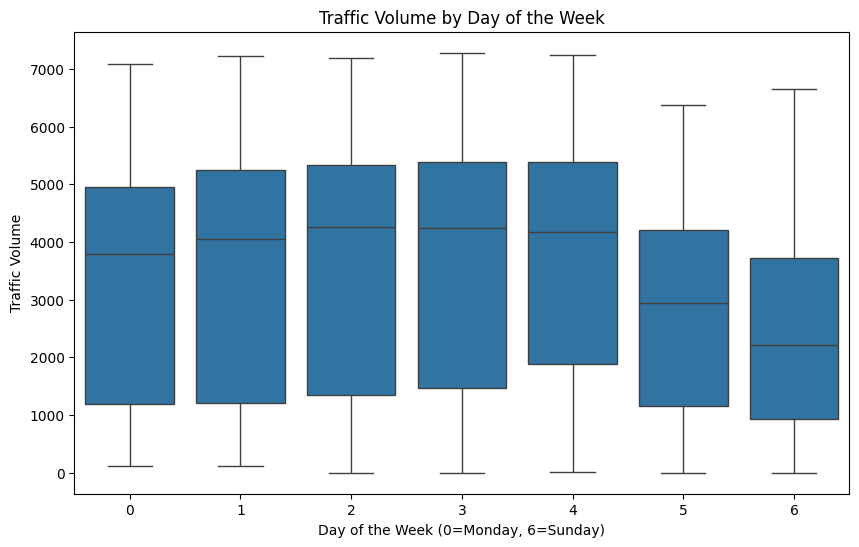

In [70]:
# Analyze traffic volume by day of the week
plt.figure(figsize=(10, 6))
sns.boxplot(x='weekday', y='traffic_volume', data=data)
plt.title('Traffic Volume by Day of the Week')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Traffic Volume')
plt.show()

In [71]:
data.corr()

,date_time,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,...,weather_description_sleet,weather_description_smoke,weather_description_snow,weather_description_thunderstorm,weather_description_thunderstorm with drizzle,weather_description_thunderstorm with heavy rain,weather_description_thunderstorm with light drizzle,weather_description_thunderstorm with light rain,weather_description_thunderstorm with rain,weather_description_very heavy rain
date_time,1.000000,-0.003577,-0.002673,0.076639,0.023148,-0.006279,-0.006279,0.127974,0.004790,0.018357,...,0.010209,0.012089,-0.005958,0.013418,0.000437,-0.008835,0.005664,-0.007564,-0.000643,-0.003050
air_pollution_index,-0.003577,1.000000,-0.000283,-0.004185,0.000838,0.003460,0.003460,0.005421,0.000443,0.007226,...,-0.003388,-0.000905,-0.001783,0.002588,0.000888,0.003799,0.005059,-0.006439,0.008157,0.005146
humidity,-0.002673,-0.000283,1.000000,-0.147034,-0.046255,0.005550,0.005550,0.033293,-0.012162,0.016625,...,0.002874,-0.008899,0.000805,0.003072,0.000133,0.000958,0.002126,0.000747,-0.001065,-0.005770
wind_speed,0.076639,-0.004185,-0.147034,1.000000,0.191412,-0.005200,-0.005200,-0.052826,0.001165,-0.006535,...,0.000456,-0.006058,0.000987,-0.002599,0.009818,-0.002816,0.000645,-0.005033,-0.002044,-0.009869
wind_direction,0.023148,0.000838,-0.046255,0.191412,1.000000,0.000836,0.000836,-0.046024,0.002233,0.000328,...,0.001508,0.022044,-0.006170,0.006782,0.003127,-0.001236,0.002978,-0.000348,-0.001903,0.007301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
weather_description_thunderstorm with heavy rain,-0.008835,0.003799,0.000958,-0.002816,-0.001236,0.006679,0.006679,0.030101,0.002601,-0.001149,...,-0.000272,-0.000793,-0.002656,-0.001563,-0.000272,1.000000,-0.000384,-0.001138,-0.000922,-0.000816
weather_description_thunderstorm with light drizzle,0.005664,0.005059,0.002126,0.000645,0.002978,0.002161,0.002161,0.009506,0.000317,-0.000354,...,-0.000084,-0.000244,-0.000819,-0.000482,-0.000084,-0.000384,1.000000,-0.000351,-0.000284,-0.000252
weather_description_thunderstorm with light rain,-0.007564,-0.006439,0.000747,-0.005033,-0.000348,0.008007,0.008007,0.027374,0.000341,-0.001049,...,-0.000248,-0.000723,-0.002425,-0.001426,-0.000248,-0.001138,-0.000351,1.000000,-0.000842,-0.000744
weather_description_thunderstorm with rain,-0.000643,0.008157,-0.001065,-0.002044,-0.001903,0.014241,0.014241,0.021721,0.001115,-0.000850,...,-0.000201,-0.000586,-0.001965,-0.001156,-0.000201,-0.000922,-0.000284,-0.000842,1.000000,-0.000603


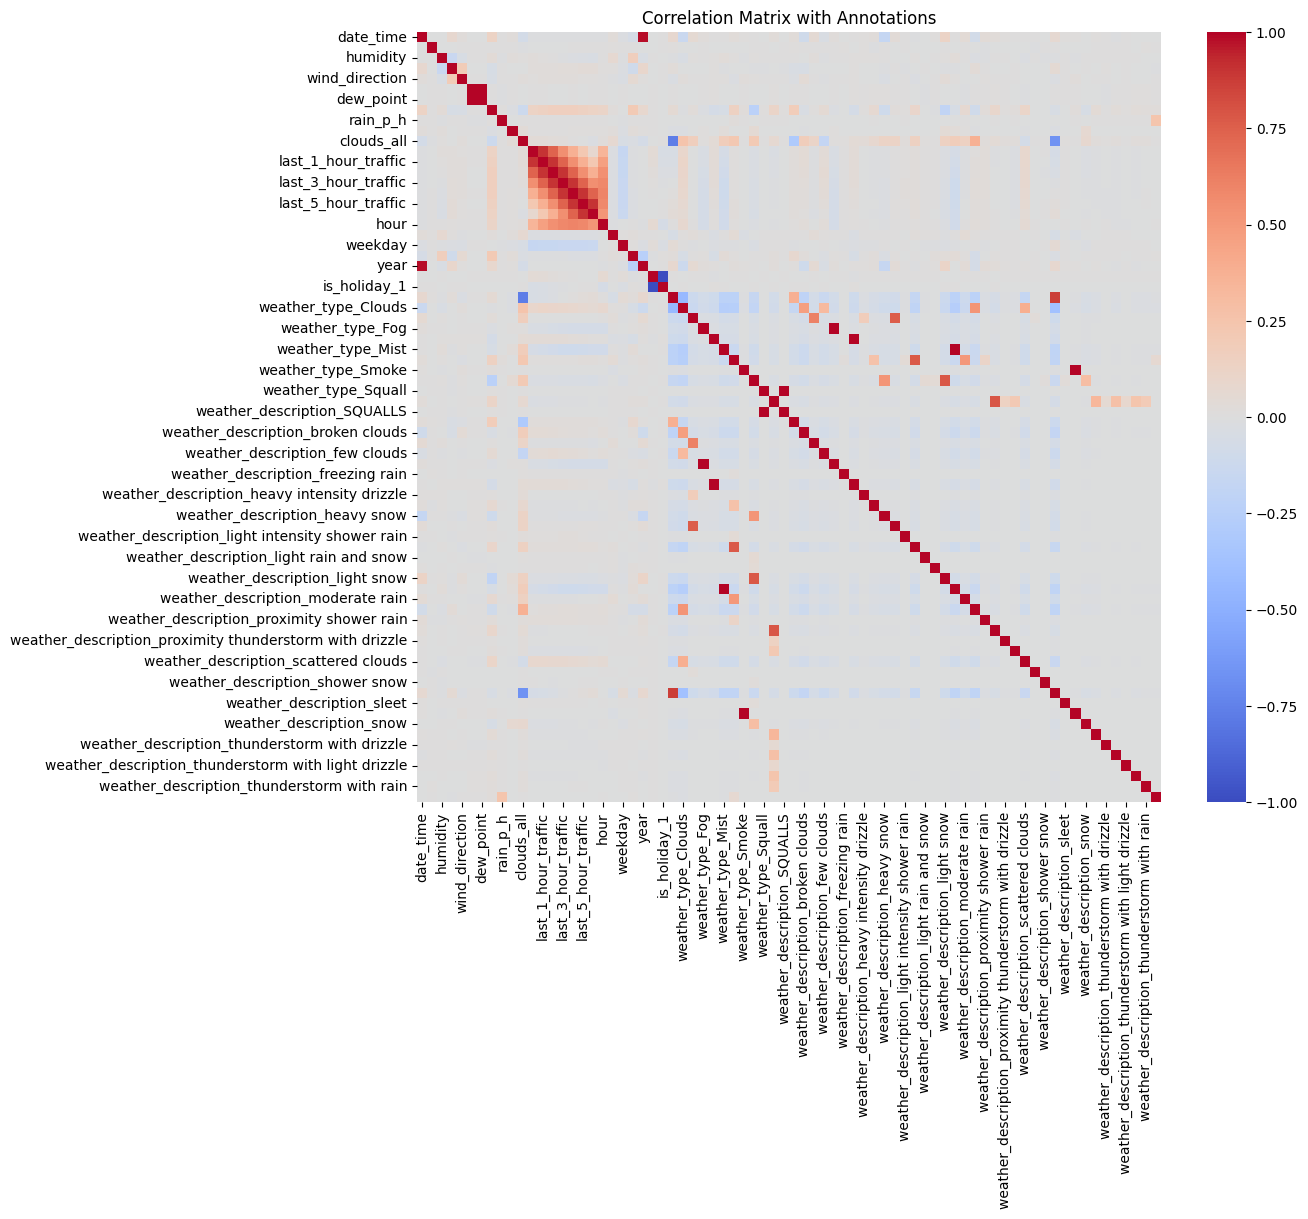

In [72]:
# Correlation Matrix with Annotations
corr = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr,cmap='coolwarm')
plt.title('Correlation Matrix with Annotations')
plt.show()

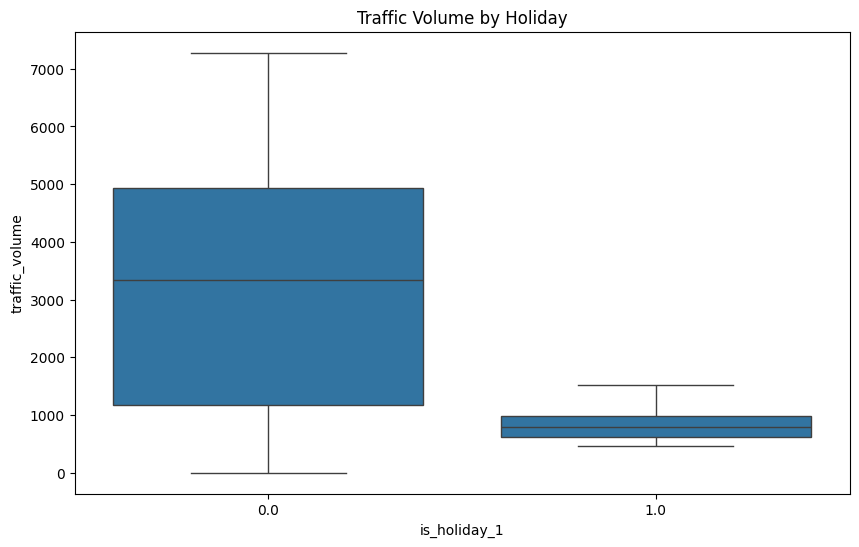

In [73]:
# Categorical Feature Analysis
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_holiday_1', y='traffic_volume', data=data)
plt.title('Traffic Volume by Holiday')
plt.show()

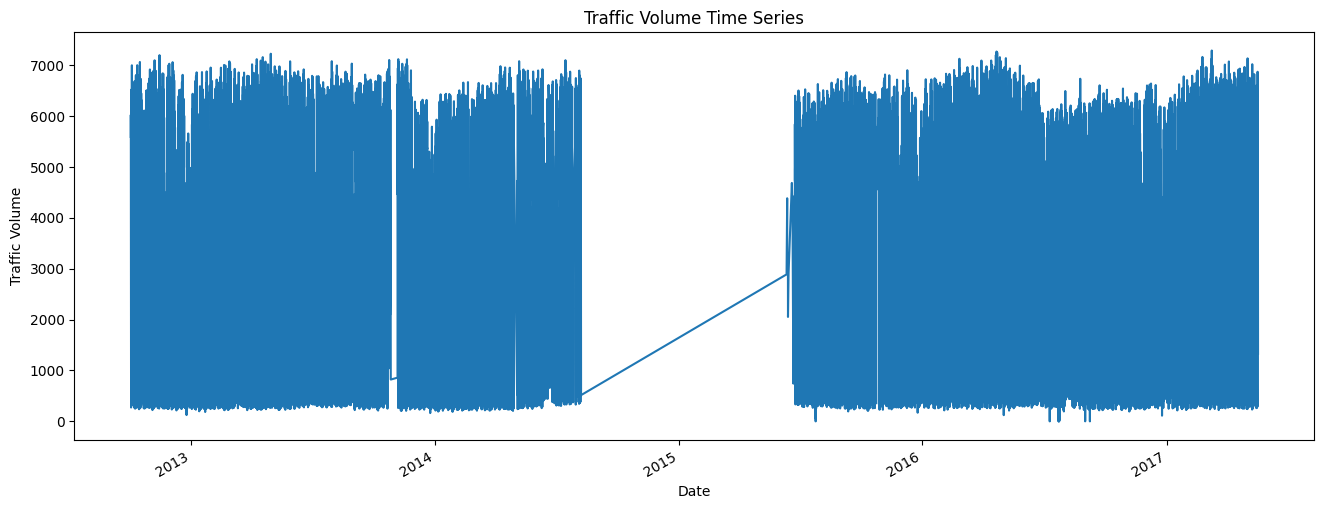

In [74]:

# Time-Series Visualization
plt.figure(figsize=(16, 6))
data.set_index('date_time')['traffic_volume'].plot()
plt.title('Traffic Volume Time Series')
plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.show()

<Figure size 800x800 with 0 Axes>

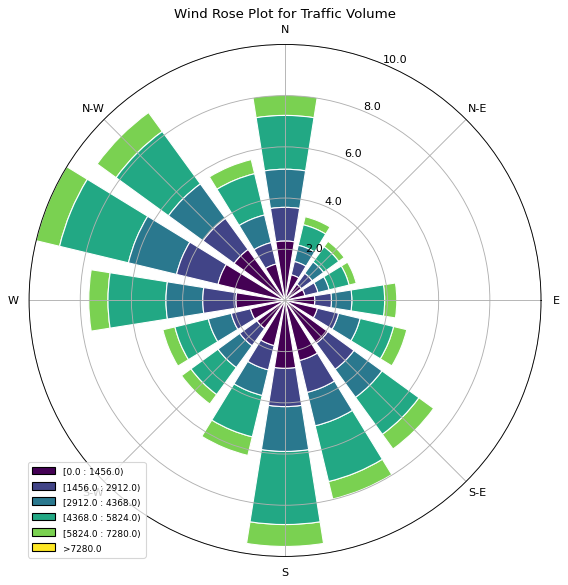

In [75]:
# Wind Rose Plot
plt.figure(figsize=(8, 8))
ax = WindroseAxes.from_ax()
ax.bar(data['wind_direction'], data['traffic_volume'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.title('Wind Rose Plot for Traffic Volume')
plt.show()

In [77]:
# Deep Learning Model (MLP with Ensemble)
# Build the MLP model
mlp_model = Sequential()
mlp_model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
mlp_model.add(BatchNormalization())
mlp_model.add(Dropout(0.2))
mlp_model.add(Dense(64, activation='relu'))
mlp_model.add(BatchNormalization())
mlp_model.add(Dropout(0.2))
mlp_model.add(Dense(32, activation='relu'))
mlp_model.add(BatchNormalization())
mlp_model.add(Dropout(0.2))
mlp_model.add(Dense(1))
mlp_model.compile(loss='mse', optimizer='adam')

In [78]:
# Train the MLP model
mlp_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/100
844/844 [==============================] - 10s 7ms/step - loss: nan - val_loss: nan
Epoch 2/100
844/844 [==============================] - 7s 9ms/step - loss: nan - val_loss: nan
Epoch 3/100
844/844 [==============================] - 3s 4ms/step - loss: nan - val_loss: nan
Epoch 4/100
844/844 [==============================] - 3s 4ms/step - loss: nan - val_loss: nan
Epoch 5/100
844/844 [==============================] - 5s 6ms/step - loss: nan - val_loss: nan
Epoch 6/100
844/844 [==============================] - 3s 4ms/step - loss: nan - val_loss: nan
Epoch 7/100
844/844 [==============================] - 3s 4ms/step - loss: nan - val_loss: nan
Epoch 8/100
844/844 [==============================] - 3s 3ms/step - loss: nan - val_loss: nan
Epoch 9/100
844/844 [==============================] - 4s 5ms/step - loss: nan - val_loss: nan
Epoch 10/100
844/844 [==============================] - 4s 4ms/step - loss: nan - val_loss: nan
Epoch 11/100
844/844 [==========================

KeyboardInterrupt: 

In [ ]:
# Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

In [ ]:
# Hyperparameter Tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)
best_rf_regressor = grid_search.best_estimator_

In [ ]:
# Train the best Random Forest Regressor
best_rf_regressor.fit(X_train, y_train)

In [ ]:
# Feature Importance
importances = best_rf_regressor.feature_importances_
feature_importances = pd.Series(importances, index=X.columns)
print(feature_importances.sort_values(ascending=False))

In [ ]:
# Model Interpretability
explainer = shap.TreeExplainer(best_rf_regressor)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [ ]:
# Additional Models
xgb_regressor = xgb.XGBRegressor(random_state=42)
xgb_regressor.fit(X_train, y_train)

In [ ]:
# Cross-Validation
scores = cross_val_score(best_rf_regressor, X_train, y_train, cv=5)
print("Cross-validated scores:", scores)

In [ ]:
# Time-Series Analysis
# Assuming 'traffic_volume' is a time-series data
model = ARIMA(data['traffic_volume'], order=(5, 1, 0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

In [ ]:
# Anomaly Detection
clf = IsolationForest(contamination=0.01)
preds = clf.fit_predict(X_train)
anomaly_index = np.where(preds == -1)
anomalies = X_train.iloc[anomaly_index]

In [ ]:
# Ensemble Model (Average of MLP, Random Forest, and XGBoost)
mlp_predictions = mlp_model.predict(X_test).flatten()
rf_predictions = best_rf_regressor.predict(X_test)
xgb_predictions = xgb_regressor.predict(X_test)
ensemble_predictions = (mlp_predictions + rf_predictions + xgb_predictions) / 3

In [ ]:
# Evaluate the ensemble model
print('Mean Squared Error:', mean_squared_error(y_test, ensemble_predictions))
print('Mean Absolute Error:', mean_absolute_error(y_test, ensemble_predictions))
print('R-squared Score:', r2_score(y_test, ensemble_predictions))

In [ ]:
# Define label mapping
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = TFBertForSequenceClassification.from_pretrained(model_name, num_labels=3)
label_map = {
    'Low traffic volume': 0,
    'Moderate traffic volume': 1,
    'High traffic volume': 2
}

In [ ]:
# Define text corpus for each label
text_corpus = {
    0: [
        "Traffic volume is low at the moment. No major actions are required.",
        "The roads are relatively clear, and traffic is flowing smoothly.",
        "No need for additional traffic management measures at this time."
    ],
    1: [
        "Traffic volume is moderate, but manageable.",
        "Consider implementing traffic control measures to ensure smooth flow.",
        "Closely monitor the situation and adjust accordingly."
    ],
    2: [
        "Traffic volume is extremely high. Immediate action is required.",
        "Deploy additional traffic personnel to manage the congestion.",
        "Consider implementing temporary lane closures or detours."
    ]
}

In [ ]:
# Tokenize and preprocess text corpus
tokenized_corpus = {}
for label_text, label in label_map.items():
    texts = text_corpus[label]
    tokenized_texts = [tokenizer.encode(text, add_special_tokens=True, max_length=128, padding='max_length', truncation=True) for text in texts]
    tokenized_corpus[label_text] = tokenized_texts


In [ ]:
# Blockchain Implementation
class Block:
    def __init__(self, index, data, previous_hash):
        self.index = index
        self.timestamp = time.time()
        self.data = data
        self.previous_hash = previous_hash
        self.hash = self.calculate_hash()

    def calculate_hash(self):
        sha = hashlib.sha256()
        data_str = str(self.index) + str(self.timestamp) + str(self.data) + str(self.previous_hash)
        sha.update(data_str.encode('utf-8'))
        return sha.hexdigest()


In [ ]:

class Blockchain:
    def __init__(self):
        self.chain = []
        self.create_genesis_block()

    def create_genesis_block(self):
        genesis_block = Block(0, "Genesis Block", "0")
        self.chain.append(genesis_block)

    def get_latest_block(self):
        return self.chain[-1]

    def add_block(self, new_data):
        previous_block = self.get_latest_block()
        new_index = previous_block.index + 1
        new_block = Block(new_index, new_data, previous_block.hash)
        self.chain.append(new_block)

In [ ]:
blockchain = Blockchain()

# Open the CSV file in write mode
with open('suggestions.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    # Write the header
    writer.writerow(["Date", "Time", "Predicted Traffic Volume", "Suggested Action"])

    for prediction in ensemble_predictions:
        # Get the current date and time
        current_date = datetime.datetime.now().strftime("%Y-%m-%d")
        current_time = datetime.datetime.now().strftime("%H:%M:%S")

        if prediction < 3000:
            label_text = 'Low traffic volume'
        elif prediction < 5000:
            label_text = 'Moderate traffic volume'
        else:
            label_text = 'High traffic volume'

        # Choose a random sample text from the correct label
        sample_texts = tokenized_corpus[label_text]
        sample_text = sample_texts[np.random.randint(len(sample_texts))]
        sample_input_ids = tf.constant(sample_text)[None, :]
        output = model(sample_input_ids)
        predicted_class = tf.argmax(output.logits, axis=-1).numpy()[0]

        # Compare the predicted class with the actual label
        actual_label = label_map[label_text]
        if predicted_class == actual_label:
            suggested_action = tokenizer.decode(sample_text)
        else:
            suggested_action = "No relevant message found."

        # Write the data to the CSV file and add to the blockchain
        traffic_data = f"{current_date},{current_time},{prediction:.2f},{suggested_action}"
        writer.writerow([current_date, current_time, f"{prediction:.2f}", suggested_action])
        blockchain.add_block(traffic_data)


In [ ]:
# Retrieve traffic data from the blockchain
for block in blockchain.chain:
    print(f"Block {block.index}: {block.data}")